# Lab 2: Create a Logic App

In this lab, you'll create a Logic App workflow and trigger it from Python.

## Prerequisites

### 1. Environment Setup
Follow the [Quick Start Guide](../docs/quickstart.md) to set up your Python environment.

### 2. Create a Logic App

1. Go to [Azure Portal](https://portal.azure.com)
2. Click **Create a resource** → Search **Logic App** → **Create**
3. Fill in:
   - **Subscription**: Your subscription
   - **Resource Group**: Create new or use existing
   - **Logic App name**: `msai-logicapp-<your-name>`
   - **Region**: East US (or closest to you)
   - **Plan type**: Consumption (pay per execution)
4. Click **Review + Create** → **Create**

### 3. Design the Workflow

1. Go to your Logic App → **Logic app designer**
2. Click **Add a trigger** → Search **HTTP** → Select **When a HTTP request is received**
3. In the HTTP trigger, click **Use sample payload to generate schema** and paste:

```json
{
    "to": "user@example.com",
    "subject": "Test Subject",
    "message": "Test message content"
}
```

4. Click **Done** to generate the schema

### 4. Add an Action (Example: Send Email with Outlook)

1. Click **+ New step** → Search **Outlook** → Select **Send an email (V2)**
2. Sign in with your Microsoft account
3. Configure:
   - **To**: Click in the field → Select **to** from Dynamic content
   - **Subject**: Click in the field → Select **subject** from Dynamic content
   - **Body**: Click in the field → Select **message** from Dynamic content
4. Click **Save**

> **Alternative:** You can use **Send an email (Gmail)**, **Post message (Slack)**, or any of the 400+ connectors!

### 5. Test it 

Run with payload...

```json
{
    "to": "user@example.com",
    "subject": "Test Subject",
    "message": "Test message content"
}
```

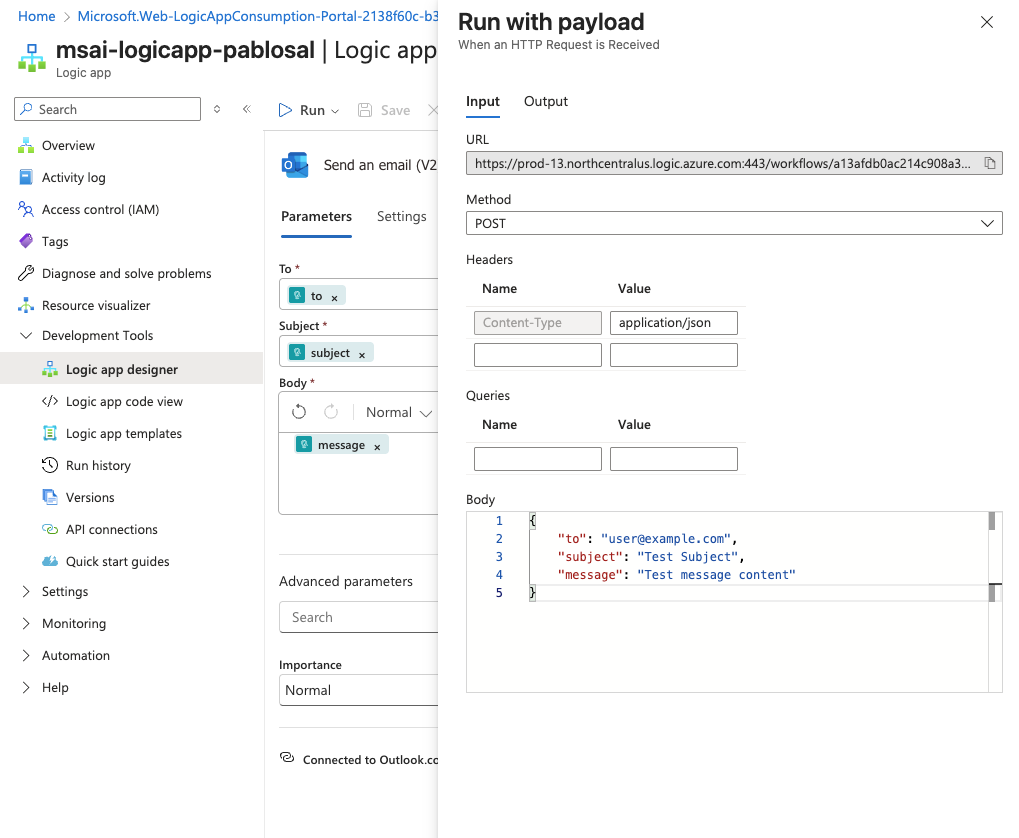

### 6. Get Your Logic App URL

1. Click on the **HTTP trigger** step
2. Copy the **HTTP POST URL** — this is your Logic App endpoint

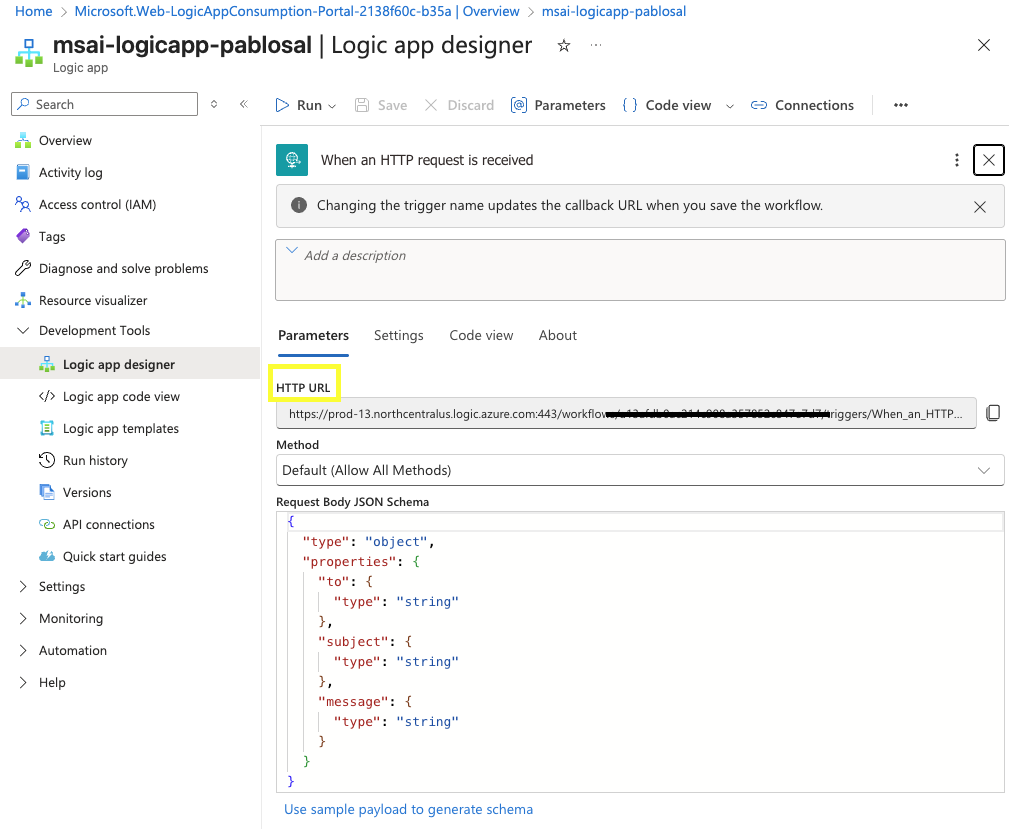

## Step 1: Setup

In [1]:
import os
import requests
from dotenv import load_dotenv

load_dotenv()

# Your Logic App URL (includes SAS token for authentication)
LOGIC_APP_URL = os.getenv(
    "LOGIC_APP_URL",
    "https://prod-xx.eastus.logic.azure.com:443/workflows/your-workflow-id/triggers/manual/paths/invoke?api-version=2016-10-01&sp=%2Ftriggers%2Fmanual%2Frun&sv=1.0&sig=your-signature",
)

print("Logic App URL configured")

Logic App URL configured


## Step 2: Trigger Your Logic App

Send a request to trigger your workflow.

In [ ]:
# Data to send to the Logic App
payload = {
    "to": "your-email@example.com",  # Change to your email
    "subject": "Test from Python",
    "message": "Hello! This email was sent by triggering a Logic App from Python.",
}

# Trigger the Logic App
response = requests.post(LOGIC_APP_URL, json=payload, headers={"Content-Type": "application/json"})

if response.status_code in [200, 202]:
    print("✅ Logic App triggered successfully!")
    print(f"   Status: {response.status_code}")
    if response.text:
        print(f"   Response: {response.text}")
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)

✅ Logic App triggered successfully!
   Status: 202


## Step 3: Create a Reusable Function

Wrap the HTTP call in a Python function you can use anywhere.

In [3]:
def send_notification(to: str, subject: str, message: str) -> bool:
    """
    Trigger the Logic App to send a notification.

    Args:
        to: Recipient email address
        subject: Email subject
        message: Email body

    Returns:
        True if successful, False otherwise
    """
    response = requests.post(
        LOGIC_APP_URL,
        json={"to": to, "subject": subject, "message": message},
        headers={"Content-Type": "application/json"},
        timeout=30,
    )
    return response.status_code in [200, 202]


# Test it
success = send_notification(
    to="your-email@example.com",
    subject="Analysis Complete",
    message="Your data analysis has finished. Results are ready!",
)
print(f"Notification sent: {success}")

Notification sent: True


## 🎯 Copilot Tips for Logic Apps

### GitHub Copilot Chat Commands
- `/explain` - Understand Logic App workflow code
- `/fix` - Fix workflow configuration errors
- `/tests` - Generate workflow tests
- `/doc` - Document workflow integrations

### Useful Prompts
- "Create a Logic App workflow for email notifications"
- "Add error handling for workflow timeouts"
- "Generate tests for the NotificationWorkflow class"
- "Create a workflow that calls multiple services"

## 📚 Additional Resources

- [Azure Logic Apps Documentation](https://learn.microsoft.com/en-us/azure/logic-apps/)
- [Logic Apps Connectors](https://learn.microsoft.com/en-us/connectors/)
- [Workflow Definition Language](https://learn.microsoft.com/en-us/azure/logic-apps/logic-apps-workflow-definition-language)

## ✅ Summary

In this lab, you learned:
- ✅ Configuring Logic Apps clients
- ✅ Triggering workflows synchronously and asynchronously
- ✅ Using workflow orchestration tools
- ✅ Implementing notification workflows
- ✅ Error handling and retry logic

**Next**: Proceed to Lab 3 to integrate everything with an AI Foundry agent!